In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
from scipy.stats import mannwhitneyu

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# makes inline plots to have better quality
#%config InlineBackend.figure_format = 'svg'

# Set the default style
plt.style.use("seaborn") 

1. Averaging over all images (people images) what percentage of right answers do they have?


2. In general people answer more Real or tend to answer more AI ?


3. Are people good at spotting AI images? are people they good at spotting Real images?


4. Simple vs comparison tasks. Which one is easier and how easier is it? 


5. How many people answer "I don't know"?


6. Do more confident people get better results (that answer definitely yes or definitely no)?


7. Are people too confident or not enough?


8. Do people improve over the task? Do they get a better percentage on the last image than on the first ?

### Load the data

In [4]:
df = pd.read_pickle("data_28.05.20/data_translated_mapped_joined.pickle")

In [5]:
df

,ts,score,age,gender,education,studied_ai,passed_sim_tests,p1,woc1,p2,...,p1_map,p2_map,p3_map,p4_map,p5_map,p6_map,p7_map,p8_map,art1_map,art2_map
0,4/17/2020 12:39:56,5,43,F,BSc,no,no,Probably no,0.8,Probably no,...,0,1,0,1,1,0,1,0,0,1
1,4/17/2020 13:49:56,6,31,M,MSc,no,no,Probably yes,0.9,I don't know,...,1,0,1,1,1,0,0,0,1,1
3,4/20/2020 0:08:15,6,51,M,MSc,no,no,Probably no,0.3,Probably yes,...,0,0,0,0,1,1,1,1,1,1
4,4/20/2020 16:21:08,6,48,M,BSc,no,no,Probably yes,0.7,Probably yes,...,1,0,1,1,0,1,1,0,0,1
5,4/20/2020 17:25:29,5,55,F,MSc,no,no,Probably yes,0.6,Probably yes,...,1,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,5/17/2020 22:52:44,3,34,F,MSc,no,no,I don't know,0.7,Probably no,...,0,1,0,0,0,0,1,1,0,0
108,5/19/2020 0:02:00,6,23,F,BSc,no,no,Probably no,0.5,Definitely no,...,0,1,1,1,0,0,0,1,1,1
109,5/26/2020 0:38:29,3,31,M,BSc,no,no,Definitely no,0.1,Probably yes,...,0,0,1,0,0,0,0,1,0,1
110,5/26/2020 12:50:09,6,35,M,BSc,no,no,Probably no,0.6,Probably no,...,0,1,0,1,1,1,1,0,1,0


In [6]:
people_simple_cols = ['p1', 'p2', 'p3', 'p4']
people_comp_cols = ['p5', 'p6', 'p7', 'p8']
people_cols = people_simple_cols + people_comp_cols

people_simple_cols_mapped = ['p1_map', 'p2_map', 'p3_map', 'p4_map']
people_comp_cols_mapped = ['p5_map', 'p6_map', 'p7_map', 'p8_map']
people_cols_mapped = people_simple_cols_mapped + people_comp_cols_mapped

art_cols = ['art1', 'art2']
art_cols_mapped = ['art1_map', 'art2_map']

question_cols = people_cols + art_cols
question_cols_mapped = people_cols_mapped + art_cols_mapped

In [7]:
df.columns

Index(['ts', 'score', 'age', 'gender', 'education', 'studied_ai',
       'passed_sim_tests', 'p1', 'woc1', 'p2', 'woc2', 'p3', 'woc3', 'p4',
       'woc4', 'p5', 'woc5', 'p6', 'woc6', 'p7', 'woc7', 'p8', 'woc8', 'art1',
       'woc_art1', 'art2', 'woc_art2', 'questionnaire_id', 'p1_map', 'p2_map',
       'p3_map', 'p4_map', 'p5_map', 'p6_map', 'p7_map', 'p8_map', 'art1_map',
       'art2_map'],
      dtype='object')

#### Data description
1. **ts** - timestamp, datetime


2. **score** - respondent's score (min 0, max 10), int


3. **age** - respondent's age, int


4. **gender** - respondent's gender, str


5. **education** - respondent's education, str


6. **studied_ai** - whether the respondent studied or worked with AI before or not, str


7. **passed_sim_tests** - whether the respondent before or not (here we consider only "no" case), str


8. **p1, p2, p3, p4** - simple questions, images of people, str


9. **p5, p6, p7, p8** - comparison questions, images of people, str


10. **art1, art2** - simple questions, modern art images, str


11. **woc1 - woc8, woc_art1, woc_art2** - wisdom-of-the-crowd questions, float


12. **questionnaire_id** - number of questionnare what the record belongs to (1,2,3,4), int


13. **p1_map - p8_map, art1_map, art2_map** - answers mapped to 0/1, int


### Data Analysis

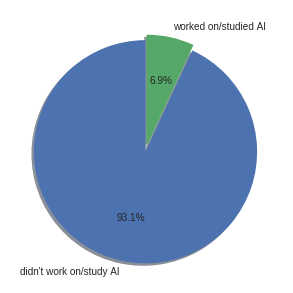

In [8]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df['studied_ai'].value_counts(),explode=(0.05,0),labels=["didn't work on/study AI",'worked on/studied AI'], autopct='%1.1f%%',
        shadow=True, startangle=90)
#plt.title("Questionnaire 4")
plt.show()

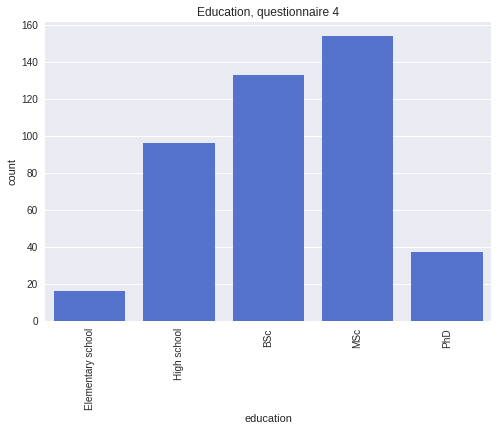

In [9]:
hist = sns.countplot(x = 'education',
                     data = df,
                     order = ["Elementary school", "High school", "BSc", "MSc", "PhD"],
                     color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Education, questionnaire 4")
plt.show()

In [10]:
df['education'].value_counts()/len(df)*100

MSc                  35.321101
BSc                  30.504587
High school          22.018349
PhD                   8.486239
Elementary school     3.669725
Name: education, dtype: float64

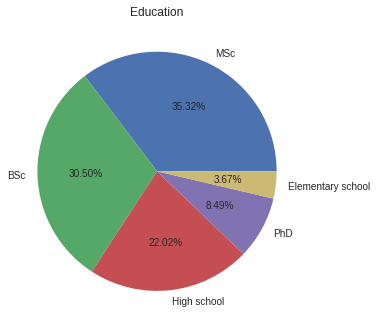

In [11]:
plt.pie(df['education'].value_counts()/len(df)*100, 
        labels=["MSc", "BSc", "High school", "PhD", "Elementary school"], 
        autopct='%1.2f%%')
plt.title("Education")
plt.show()

**1. Averaging over all images (people images), what percentage of right answers do the respondents have?**

In [12]:
cols = people_cols_mapped + ['questionnaire_id']

df1 = df[cols]
df1

,p1_map,p2_map,p3_map,p4_map,p5_map,p6_map,p7_map,p8_map,questionnaire_id
0,0,1,0,1,1,0,1,0,1
1,1,0,1,1,1,0,0,0,1
3,0,0,0,0,1,1,1,1,1
4,1,0,1,1,0,1,1,0,1
5,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
107,0,1,0,0,0,0,1,1,4
108,0,1,1,1,0,0,0,1,4
109,0,0,1,0,0,0,0,1,4
110,0,1,0,1,1,1,1,0,4


In [13]:
df1['correct_answer_percent'] = np.sum(df1[people_cols_mapped], axis=1)/8*100

In [14]:
df1

,p1_map,p2_map,p3_map,p4_map,p5_map,p6_map,p7_map,p8_map,questionnaire_id,correct_answer_percent
0,0,1,0,1,1,0,1,0,1,50.0
1,1,0,1,1,1,0,0,0,1,50.0
3,0,0,0,0,1,1,1,1,1,50.0
4,1,0,1,1,0,1,1,0,1,62.5
5,1,0,0,1,0,0,1,0,1,37.5
...,...,...,...,...,...,...,...,...,...,...
107,0,1,0,0,0,0,1,1,4,37.5
108,0,1,1,1,0,0,0,1,4,50.0
109,0,0,1,0,0,0,0,1,4,25.0
110,0,1,0,1,1,1,1,0,4,62.5


In [15]:
np.min(df1['correct_answer_percent'])

0.0

In [16]:
np.max(df1['correct_answer_percent'])

100.0

In [17]:
np.mean(df1['correct_answer_percent'])

56.680045871559635

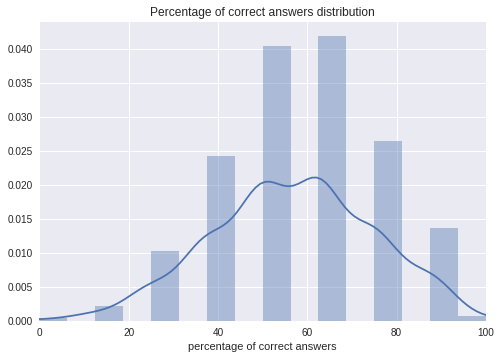

In [18]:
ax = sns.distplot(pd.Series(df1['correct_answer_percent'], name="percentage of correct answers"))
ax.set(xlim=(0,100))
plt.title('Percentage of correct answers distribution')
plt.show()

**2. In general people answer more Real or tend to answer more AI ?**

In [19]:
df2 = df[people_simple_cols]
df2

,p1,p2,p3,p4
0,Probably no,Probably no,I don't know,Probably yes
1,Probably yes,I don't know,Probably no,Definitely yes
3,Probably no,Probably yes,Definitely yes,Definitely no
4,Probably yes,Probably yes,Probably no,Probably yes
5,Probably yes,Probably yes,Probably yes,Probably yes
...,...,...,...,...
107,I don't know,Probably no,Probably no,Probably yes
108,Probably no,Definitely no,Definitely yes,Definitely no
109,Definitely no,Probably yes,Probably yes,Probably yes
110,Probably no,Probably no,Definitely no,Probably no


In [20]:
value_counts_sum = (df2['p1'].value_counts() + df2['p2'].value_counts() +  
                    df2['p3'].value_counts() + df2['p4'].value_counts())

In [21]:
value_counts_sum

Definitely no     160
Definitely yes    198
I don't know       64
Probably no       709
Probably yes      613
dtype: int64

In [22]:
answer_real_count = value_counts_sum['Probably yes'] + value_counts_sum['Definitely yes']
answer_ai_count = value_counts_sum['Probably no'] + value_counts_sum['Definitely no']
dont_know_count = value_counts_sum["I don't know"]

In [23]:
answer_real_count

811

In [24]:
answer_ai_count

869

In [25]:
dont_know_count

64

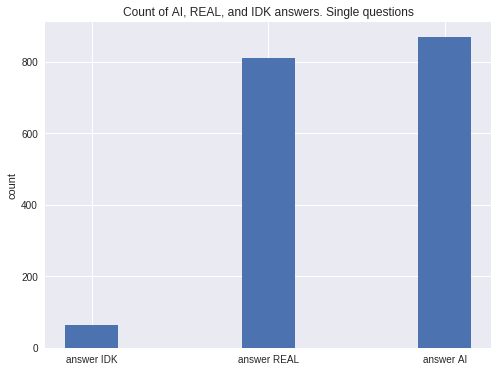

In [26]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.bar([0,1,2],[dont_know_count, answer_real_count, answer_ai_count], 0.3)
plt.ylabel('count')

ax.set_xticks([0,1,2])
ax.set_xticklabels(("answer IDK", 'answer REAL', 'answer AI'))

plt.title("Count of AI, REAL, and IDK answers. Single questions")

plt.show()

**3. Are people good at spotting AI images? are people they good at spotting Real images?**

**4. Simple vs comparison tasks. Which one is easier and how easier is it?**

In [27]:
df4 = df[people_cols_mapped]
df4

,p1_map,p2_map,p3_map,p4_map,p5_map,p6_map,p7_map,p8_map
0,0,1,0,1,1,0,1,0
1,1,0,1,1,1,0,0,0
3,0,0,0,0,1,1,1,1
4,1,0,1,1,0,1,1,0
5,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
107,0,1,0,0,0,0,1,1
108,0,1,1,1,0,0,0,1
109,0,0,1,0,0,0,0,1
110,0,1,0,1,1,1,1,0


In [28]:
df4['sum_points_simple'] = np.sum(df4[people_simple_cols_mapped], axis = 1)
df4['sum_points_comp'] = np.sum(df4[people_comp_cols_mapped], axis = 1)

In [29]:
df4

,p1_map,p2_map,p3_map,p4_map,p5_map,p6_map,p7_map,p8_map,sum_points_simple,sum_points_comp
0,0,1,0,1,1,0,1,0,2,2
1,1,0,1,1,1,0,0,0,3,1
3,0,0,0,0,1,1,1,1,0,4
4,1,0,1,1,0,1,1,0,3,2
5,1,0,0,1,0,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...
107,0,1,0,0,0,0,1,1,1,2
108,0,1,1,1,0,0,0,1,3,1
109,0,0,1,0,0,0,0,1,1,1
110,0,1,0,1,1,1,1,0,2,3


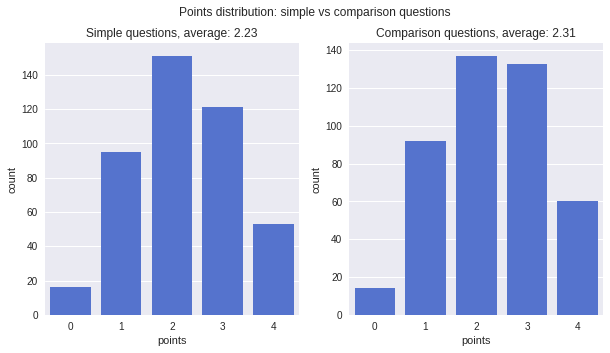

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

hist1 = sns.countplot(x = 'sum_points_simple',
                      data = df4,
                      color = "royalblue",
                      ax = ax1)
ax1.set_xlabel('points')
ax1.set_title('Simple questions, average: ' + str(np.round(np.mean(df4['sum_points_simple']),2)))

hist2 = sns.countplot(x = 'sum_points_comp',
                      data = df4,
                      color = "royalblue",
                      ax = ax2)

ax2.set_xlabel('points')
ax2.set_title('Comparison questions, average: ' + str(np.round(np.mean(df4['sum_points_comp']),2)))

fig.suptitle("Points distribution: simple vs comparison questions")
plt.show()

**5. How many people answer "I don't know"?**

In [45]:
df5 = df[people_cols]
df5

,p1,p2,p3,p4,p5,p6,p7,p8
0,Probably no,Probably no,I don't know,Probably yes,Probably left one,Probably left one,Probably right one,Probably right one
1,Probably yes,I don't know,Probably no,Definitely yes,Probably left one,Probably left one,Probably left one,Probably right one
3,Probably no,Probably yes,Definitely yes,Definitely no,Probably left one,Probably right one,Definitely right one,Probably left one
4,Probably yes,Probably yes,Probably no,Probably yes,Probably right one,Probably right one,Probably right one,I don't know
5,Probably yes,Probably yes,Probably yes,Probably yes,Probably right one,Probably left one,Probably right one,Probably right one
...,...,...,...,...,...,...,...,...
107,I don't know,Probably no,Probably no,Probably yes,Probably right one,Probably left one,Probably right one,Probably left one
108,Probably no,Definitely no,Definitely yes,Definitely no,Probably right one,Definitely left one,Definitely left one,Definitely left one
109,Definitely no,Probably yes,Probably yes,Probably yes,Probably right one,Definitely left one,Probably left one,Definitely left one
110,Probably no,Probably no,Definitely no,Probably no,Probably left one,Probably right one,Probably right one,I don't know


In [46]:
df5 = pd.concat([df5, df5.apply(pd.Series.value_counts, axis=1).fillna(0)], axis=1)

In [47]:
df5

,p1,p2,p3,p4,p5,p6,p7,p8,Definitely left one,Definitely no,Definitely right one,Definitely yes,I don't know,Probably left one,Probably no,Probably right one,Probably yes
0,Probably no,Probably no,I don't know,Probably yes,Probably left one,Probably left one,Probably right one,Probably right one,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0
1,Probably yes,I don't know,Probably no,Definitely yes,Probably left one,Probably left one,Probably left one,Probably right one,0.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0
3,Probably no,Probably yes,Definitely yes,Definitely no,Probably left one,Probably right one,Definitely right one,Probably left one,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0
4,Probably yes,Probably yes,Probably no,Probably yes,Probably right one,Probably right one,Probably right one,I don't know,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0
5,Probably yes,Probably yes,Probably yes,Probably yes,Probably right one,Probably left one,Probably right one,Probably right one,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,I don't know,Probably no,Probably no,Probably yes,Probably right one,Probably left one,Probably right one,Probably left one,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0
108,Probably no,Definitely no,Definitely yes,Definitely no,Probably right one,Definitely left one,Definitely left one,Definitely left one,3.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
109,Definitely no,Probably yes,Probably yes,Probably yes,Probably right one,Definitely left one,Probably left one,Definitely left one,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0
110,Probably no,Probably no,Definitely no,Probably no,Probably left one,Probably right one,Probably right one,I don't know,0.0,1.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0


In [48]:
df5[df5["I don't know"] > 0]

,p1,p2,p3,p4,p5,p6,p7,p8,Definitely left one,Definitely no,Definitely right one,Definitely yes,I don't know,Probably left one,Probably no,Probably right one,Probably yes
0,Probably no,Probably no,I don't know,Probably yes,Probably left one,Probably left one,Probably right one,Probably right one,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0
1,Probably yes,I don't know,Probably no,Definitely yes,Probably left one,Probably left one,Probably left one,Probably right one,0.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0
4,Probably yes,Probably yes,Probably no,Probably yes,Probably right one,Probably right one,Probably right one,I don't know,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0
9,I don't know,Probably no,Probably yes,Probably yes,Probably left one,Probably left one,Probably right one,Probably right one,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0
12,Probably no,Probably yes,Probably no,Probably no,Probably right one,Probably left one,I don't know,Probably right one,0.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Probably no,Definitely no,Definitely yes,I don't know,Probably right one,Definitely right one,Probably left one,Probably right one,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
92,Probably no,I don't know,Probably no,Probably no,Probably right one,Probably left one,Probably right one,Probably right one,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0
103,I don't know,I don't know,Probably yes,Probably yes,I don't know,Probably right one,I don't know,I don't know,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,2.0
107,I don't know,Probably no,Probably no,Probably yes,Probably right one,Probably left one,Probably right one,Probably left one,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0


In [49]:
print("~" + str(np.round(len(df5[df5["I don't know"] > 0])/len(df5)*100))+
      "% of respondents answered I don't know at least once")

~20.0% of respondents answered I don't know at least once


**6. Do more confident people get better results (that answer definitely yes or definitely no)?**

In [50]:
df5['definitely_sum'] = df5['Definitely left one'] + df5['Definitely no'] + df5['Definitely right one'] + df5['Definitely yes']
df5['probably_sum'] = df5['Probably left one'] + df5['Probably no'] + df5['Probably right one'] + df5['Probably yes'] 


In [51]:
df5

,p1,p2,p3,p4,p5,p6,p7,p8,Definitely left one,Definitely no,Definitely right one,Definitely yes,I don't know,Probably left one,Probably no,Probably right one,Probably yes,definitely_sum,probably_sum
0,Probably no,Probably no,I don't know,Probably yes,Probably left one,Probably left one,Probably right one,Probably right one,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,0.0,7.0
1,Probably yes,I don't know,Probably no,Definitely yes,Probably left one,Probably left one,Probably left one,Probably right one,0.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,6.0
3,Probably no,Probably yes,Definitely yes,Definitely no,Probably left one,Probably right one,Definitely right one,Probably left one,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,3.0,5.0
4,Probably yes,Probably yes,Probably no,Probably yes,Probably right one,Probably right one,Probably right one,I don't know,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,0.0,7.0
5,Probably yes,Probably yes,Probably yes,Probably yes,Probably right one,Probably left one,Probably right one,Probably right one,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,I don't know,Probably no,Probably no,Probably yes,Probably right one,Probably left one,Probably right one,Probably left one,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,0.0,7.0
108,Probably no,Definitely no,Definitely yes,Definitely no,Probably right one,Definitely left one,Definitely left one,Definitely left one,3.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,6.0,2.0
109,Definitely no,Probably yes,Probably yes,Probably yes,Probably right one,Definitely left one,Probably left one,Definitely left one,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,5.0
110,Probably no,Probably no,Definitely no,Probably no,Probably left one,Probably right one,Probably right one,I don't know,0.0,1.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,6.0


In [52]:
df5['definitely_sum'].value_counts()

0.0    147
1.0     98
2.0     70
3.0     51
4.0     30
5.0     17
6.0     10
7.0      8
8.0      5
Name: definitely_sum, dtype: int64

In [53]:
df5['probably_sum'].value_counts()

8.0    113
7.0    103
6.0     71
5.0     67
4.0     36
3.0     20
2.0     10
1.0     10
0.0      6
Name: probably_sum, dtype: int64

In [57]:
len(df5[df5["definitely_sum"] > df5["probably_sum"]])

44

In [58]:
len(df5[df5["probably_sum"] > df5["definitely_sum"]])

366

In [54]:
df5['people_questions_score'] = np.sum(df[people_cols_mapped], axis=1)

In [55]:
df5

,p1,p2,p3,p4,p5,p6,p7,p8,Definitely left one,Definitely no,Definitely right one,Definitely yes,I don't know,Probably left one,Probably no,Probably right one,Probably yes,definitely_sum,probably_sum,people_questions_score
0,Probably no,Probably no,I don't know,Probably yes,Probably left one,Probably left one,Probably right one,Probably right one,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,0.0,7.0,4
1,Probably yes,I don't know,Probably no,Definitely yes,Probably left one,Probably left one,Probably left one,Probably right one,0.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,6.0,4
3,Probably no,Probably yes,Definitely yes,Definitely no,Probably left one,Probably right one,Definitely right one,Probably left one,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,3.0,5.0,4
4,Probably yes,Probably yes,Probably no,Probably yes,Probably right one,Probably right one,Probably right one,I don't know,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,0.0,7.0,5
5,Probably yes,Probably yes,Probably yes,Probably yes,Probably right one,Probably left one,Probably right one,Probably right one,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,8.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,I don't know,Probably no,Probably no,Probably yes,Probably right one,Probably left one,Probably right one,Probably left one,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,0.0,7.0,3
108,Probably no,Definitely no,Definitely yes,Definitely no,Probably right one,Definitely left one,Definitely left one,Definitely left one,3.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,6.0,2.0,4
109,Definitely no,Probably yes,Probably yes,Probably yes,Probably right one,Definitely left one,Probably left one,Definitely left one,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,5.0,2
110,Probably no,Probably no,Definitely no,Probably no,Probably left one,Probably right one,Probably right one,I don't know,0.0,1.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,6.0,5


In [59]:
df5_def = df5[df5["definitely_sum"] > df5["probably_sum"]]
df5_prob = df5[df5["probably_sum"] > df5["definitely_sum"]]

In [65]:
df5_def.head()

,p1,p2,p3,p4,p5,p6,p7,p8,Definitely left one,Definitely no,Definitely right one,Definitely yes,I don't know,Probably left one,Probably no,Probably right one,Probably yes,definitely_sum,probably_sum,people_questions_score
10,Definitely yes,Definitely yes,Definitely yes,Definitely yes,Probably left one,Definitely right one,Probably right one,Probably right one,0.0,0.0,1.0,4.0,0.0,1.0,0.0,2.0,0.0,5.0,3.0,5
11,Definitely yes,Probably yes,Probably no,Definitely yes,Definitely left one,Definitely right one,Definitely right one,Probably right one,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,5.0,3.0,6
37,Probably yes,Definitely yes,Definitely yes,Definitely yes,Definitely right one,Definitely left one,Definitely right one,Definitely right one,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0,3
40,Probably no,I don't know,Definitely yes,Definitely yes,Definitely right one,Definitely right one,Probably left one,Definitely right one,0.0,0.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0,5.0,2.0,2
48,Probably yes,Definitely no,Probably no,Definitely yes,Definitely right one,Definitely right one,Definitely right one,Probably left one,0.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,3.0,7


In [63]:
np.mean(df5_def['people_questions_score'])

4.431818181818182

In [66]:
df5_prob.head()

,p1,p2,p3,p4,p5,p6,p7,p8,Definitely left one,Definitely no,Definitely right one,Definitely yes,I don't know,Probably left one,Probably no,Probably right one,Probably yes,definitely_sum,probably_sum,people_questions_score
0,Probably no,Probably no,I don't know,Probably yes,Probably left one,Probably left one,Probably right one,Probably right one,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,0.0,7.0,4
1,Probably yes,I don't know,Probably no,Definitely yes,Probably left one,Probably left one,Probably left one,Probably right one,0.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,6.0,4
3,Probably no,Probably yes,Definitely yes,Definitely no,Probably left one,Probably right one,Definitely right one,Probably left one,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,3.0,5.0,4
4,Probably yes,Probably yes,Probably no,Probably yes,Probably right one,Probably right one,Probably right one,I don't know,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,0.0,7.0,5
5,Probably yes,Probably yes,Probably yes,Probably yes,Probably right one,Probably left one,Probably right one,Probably right one,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,8.0,3


In [64]:
np.mean(df5_prob['people_questions_score'])

4.532786885245901

In [71]:
mannwhitneyu(df5_def['people_questions_score'], df5_prob['people_questions_score'], alternative = 'two-sided')

MannwhitneyuResult(statistic=7652.0, pvalue=0.5824969433192873)

**7. Are people too confident or not enough?**

**8. Do people improve over the task? Do they get a better percentage on the last image than on the first ?**

In [73]:
questions_average = np.sum(df[people_cols_mapped], axis = 0)/df.shape[0]
questions_average = np.round(questions_average*100,2)

In [74]:
questions_average

p1_map    58.26
p2_map    52.75
p3_map    53.21
p4_map    58.72
p5_map    57.57
p6_map    53.67
p7_map    63.76
p8_map    55.50
dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

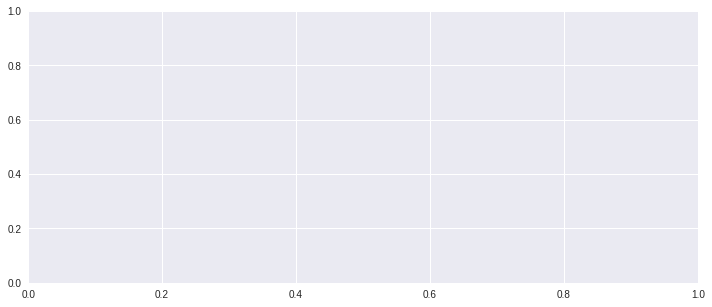

In [76]:
N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.32       # the width of the bars

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

bars_q = ax.bar(ind, questions_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind)
ax.set_xticklabels(tuple(people_cols_map))


plt.title("Percent of correct answers per question")
plt.show()